<a href="https://colab.research.google.com/github/anish2105/Mental-Health-Analyser/blob/main/Mental_Health_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mental Health Analysis using NLP**

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import string
from nltk.tokenize import TweetTokenizer

In [2]:
df = pd.read_csv("/content/mental_health.csv")
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


Here label:0 stands for not a mental issue whereas label:1 stands for there is a mental issue.

In [3]:
df['text'].astype(str)
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [4]:
df['text'][27527]

'dont want feel way anymorei keep flipping depressed feeling absolutely nothing dont want feel way anymore first appointment get psychiatrist wont march dont know last long im give everything depressed could handle that life numb nothingness feeling whats breaking down dont know anymore'

In [5]:
df['text'] = df['text'].str.lower()
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


**Remove Punctuations**

In [6]:
punct_to_remove = string.punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans('','',punct_to_remove))

df['text'] = df['text'].apply(lambda text : remove_punctuation(text))
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [7]:
df.isna().sum()

text     0
label    0
dtype: int64

In [8]:
import os
import re

import numpy as np
import tensorflow as tf

import pandas as pd
import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.metrics import f1_score, classification_report, log_loss

from keras.preprocessing.text import Tokenizer
# from keras_preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Flatten
from keras.layers import Dropout, Conv1D, GlobalMaxPool1D, GRU, GlobalAvgPool1D
# from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [9]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
def cleaning_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in stopwords])

df['text'] = df['text'].apply(lambda text : cleaning_stopwords(text))
df['text'].head()

0    dear american teens question dutch person hear...
1    nothing look forward lifei dont many reasons k...
2    music recommendations im looking expand playli...
3    im done trying feel betterthe reason im still ...
4    worried year old girl subject domestic physica...
Name: text, dtype: object

**Lemmentization**

In [11]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['text'] = df['text'].apply(lambda x: lemmatizer_on_text(x))
df['text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0    dear american teens question dutch person hear...
1    nothing look forward lifei dont many reasons k...
2    music recommendations im looking expand playli...
3    im done trying feel betterthe reason im still ...
4    worried year old girl subject domestic physica...
Name: text, dtype: object

In [12]:
x = df['text']
y = df['label']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(x, y,random_state = 42, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(25179,)
(2798,)


**Text Sequencing**

In [14]:
tokenizer = Tokenizer(lower = False)
tokenizer.fit_on_texts(X_train)
train_text_vec = tokenizer.texts_to_sequences(X_train)
tokenizer.fit_on_texts(X_test)
test_text_vec = tokenizer.texts_to_sequences(X_test)
test_text_vec

[[1,
  466,
  68351,
  1202,
  80,
  3430,
  61,
  166,
  1511,
  1044,
  823,
  54,
  416,
  2784,
  1533,
  96,
  64,
  2303,
  459,
  416,
  192,
  50,
  58,
  325,
  29,
  6,
  10,
  820,
  815,
  1143,
  1078,
  6,
  1305,
  1594,
  959,
  10,
  58,
  262,
  9,
  243,
  309,
  34,
  49,
  19,
  985,
  357,
  96,
  1,
  18,
  55,
  259],
 [9636,
  68352,
  483,
  1,
  3115,
  3603,
  639,
  340,
  1555,
  1778,
  632,
  2819,
  387,
  815,
  154,
  63,
  1683,
  740,
  306,
  86,
  803,
  83,
  47,
  915,
  68353,
  22,
  21603,
  2638,
  47,
  1341,
  984,
  154,
  615,
  1890,
  561,
  331,
  1532,
  3927,
  536,
  3553,
  1260,
  12,
  148,
  137,
  305,
  331,
  12824,
  138,
  186,
  102,
  1532,
  1113,
  47,
  4640,
  1550,
  1879,
  47,
  427,
  1299,
  181,
  60,
  7997,
  1890,
  561,
  1341,
  915,
  116,
  415,
  35,
  8012,
  53,
  3546,
  8583,
  1260,
  385,
  561,
  4640,
  35,
  1113,
  47,
  74,
  22,
  3859,
  63,
  329,
  302,
  3,
  915,
  40,
  1296,
  222,
  

In [24]:
lenght = []
for i in (train_text_vec + test_text_vec):
  if 10<len(i)<50:
    lenght.append(len(i))
max(lenght)

49

In [25]:
from keras.preprocessing import sequence
max_words = 49
X_train = keras.utils.pad_sequences(train_text_vec, maxlen=max_words)
X_test = keras.utils.pad_sequences(test_text_vec, maxlen=max_words)
modelRNN = None
modelLSTM = None
print("After Padding x[train[0]=\n" , X_test[0])

After Padding x[train[0]=
 [68351  1202    80  3430    61   166  1511  1044   823    54   416  2784
  1533    96    64  2303   459   416   192    50    58   325    29     6
    10   820   815  1143  1078     6  1305  1594   959    10    58   262
     9   243   309    34    49    19   985   357    96     1    18    55
   259]


**Modelling**

In [26]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 72426 unique tokens.


In [27]:
vocabulary_size = len((train_text_vec + test_text_vec))*2

**Glove Embeddings**

In [28]:
embeddings_index = {}
f = open('/content/glove.6B.100d.txt',encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 157043 word vectors.


In [32]:
embedding_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


**Recurrent Neural Network(RNN)**

In [33]:
from keras.layers import SimpleRNN
from tensorflow.keras import regularizers

In [35]:
embedding_size=100

modelRNN=Sequential()
modelRNN.add(Embedding(len(word_index) + 1,embedding_size,weights = [embedding_matrix],input_length=max_words)) #embdsize
# modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelRNN.add(Dropout(0.70))
modelRNN.add(SimpleRNN(150,activation = "tanh",kernel_regularizer=regularizers.l2(0.01))) 
modelRNN.add(Dropout(0.15))
modelRNN.add(Dense(1, activation='sigmoid'))
print(modelRNN.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 49, 100)           7242700   
                                                                 
 dropout (Dropout)           (None, 49, 100)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 150)               37650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 7,280,501
Trainable params: 7,280,501
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
modelRNN.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [37]:
batch_size = 1024
num_epochs = 20
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
callback_listRNN  = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modRNN_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [38]:
history = modelRNN.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs, 
             callbacks=callback_listRNN)
modelRNN.save_weights("my_modRNN_Latest")

Epoch 1/20
24/24 [==============================] - ETA: 0s - loss: 1.7489 - accuracy: 0.5337

24/24 [==============================] - 12s 224ms/step - loss: 1.7489 - accuracy: 0.5337 - val_loss: 1.5697 - val_accuracy: 0.5176
Epoch 2/20
24/24 [==============================] - ETA: 0s - loss: 1.2892 - accuracy: 0.7047

24/24 [==============================] - 6s 233ms/step - loss: 1.2892 - accuracy: 0.7047 - val_loss: 1.3450 - val_accuracy: 0.6650
Epoch 3/20
24/24 [==============================] - ETA: 0s - loss: 1.0240 - accuracy: 0.7555

24/24 [==============================] - 6s 240ms/step - loss: 1.0240 - accuracy: 0.7555 - val_loss: 1.2067 - val_accuracy: 0.6787
Epoch 4/20
24/24 [==============================] - ETA: 0s - loss: 0.8434 - accuracy: 0.7844

24/24 [==============================] - 7s 286ms/step - loss: 0.8434 - accuracy: 0.7844 - val_loss: 1.0450 - val_accuracy: 0.6953
Epoch 5/20
24/24 [==============================] - ETA: 0s - loss: 0.7194 - accuracy: 0.7998

24/24 [==============================] - 5s 203ms/step - loss: 0.7194 - accuracy: 0.7998 - val_loss: 0.8316 - val_accuracy: 0.7373
Epoch 6/20
24/24 [==============================] - ETA: 0s - loss: 0.6215 - accuracy: 0.8204

24/24 [==============================] - 5s 235ms/step - loss: 0.6215 - accuracy: 0.8204 - val_loss: 0.8990 - val_accuracy: 0.7314
Epoch 7/20
24/24 [==============================] - ETA: 0s - loss: 0.5474 - accuracy: 0.8335

24/24 [==============================] - 4s 168ms/step - loss: 0.5474 - accuracy: 0.8335 - val_loss: 0.7545 - val_accuracy: 0.7734
Epoch 8/20
24/24 [==============================] - ETA: 0s - loss: 0.4895 - accuracy: 0.8474

24/24 [==============================] - 3s 148ms/step - loss: 0.4895 - accuracy: 0.8474 - val_loss: 0.5731 - val_accuracy: 0.8193
Epoch 9/20
24/24 [==============================] - ETA: 0s - loss: 0.4573 - accuracy: 0.8545

24/24 [==============================] - 5s 222ms/step - loss: 0.4573 - accuracy: 0.8545 - val_loss: 0.5686 - val_accuracy: 0.8213
Epoch 10/20
24/24 [==============================] - ETA: 0s - loss: 0.4169 - accuracy: 0.8652

24/24 [==============================] - 4s 168ms/step - loss: 0.4169 - accuracy: 0.8652 - val_loss: 0.4782 - val_accuracy: 0.8672
Epoch 11/20
24/24 [==============================] - ETA: 0s - loss: 0.3920 - accuracy: 0.8714

24/24 [==============================] - 4s 162ms/step - loss: 0.3920 - accuracy: 0.8714 - val_loss: 0.5276 - val_accuracy: 0.8379
Epoch 12/20
24/24 [==============================] - ETA: 0s - loss: 0.3670 - accuracy: 0.8782

24/24 [==============================] - 6s 239ms/step - loss: 0.3670 - accuracy: 0.8782 - val_loss: 0.4160 - val_accuracy: 0.8682
Epoch 13/20
24/24 [==============================] - ETA: 0s - loss: 0.3502 - accuracy: 0.8864

24/24 [==============================] - 3s 136ms/step - loss: 0.3502 - accuracy: 0.8864 - val_loss: 0.3626 - val_accuracy: 0.8926
Epoch 14/20
24/24 [==============================] - ETA: 0s - loss: 0.3510 - accuracy: 0.8800

24/24 [==============================] - 3s 142ms/step - loss: 0.3510 - accuracy: 0.8800 - val_loss: 0.4658 - val_accuracy: 0.8213
Epoch 15/20
24/24 [==============================] - ETA: 0s - loss: 0.3483 - accuracy: 0.8830

24/24 [==============================] - 4s 155ms/step - loss: 0.3483 - accuracy: 0.8830 - val_loss: 0.4055 - val_accuracy: 0.8701
Epoch 16/20
24/24 [==============================] - ETA: 0s - loss: 0.3147 - accuracy: 0.8965

24/24 [==============================] - 3s 142ms/step - loss: 0.3147 - accuracy: 0.8965 - val_loss: 0.4762 - val_accuracy: 0.8564
Epoch 17/20
24/24 [==============================] - ETA: 0s - loss: 0.2930 - accuracy: 0.9023

24/24 [==============================] - 3s 120ms/step - loss: 0.2930 - accuracy: 0.9023 - val_loss: 0.4084 - val_accuracy: 0.8916
Epoch 18/20
24/24 [==============================] - ETA: 0s - loss: 0.2835 - accuracy: 0.9039

24/24 [==============================] - 3s 128ms/step - loss: 0.2835 - accuracy: 0.9039 - val_loss: 0.3620 - val_accuracy: 0.8965
Epoch 19/20
24/24 [==============================] - ETA: 0s - loss: 0.2828 - accuracy: 0.9062

24/24 [==============================] - 4s 190ms/step - loss: 0.2828 - accuracy: 0.9062 - val_loss: 0.4418 - val_accuracy: 0.8721
Epoch 20/20
24/24 [==============================] - ETA: 0s - loss: 0.2645 - accuracy: 0.9084

24/24 [==============================] - 2s 91ms/step - loss: 0.2645 - accuracy: 0.9084 - val_loss: 0.2890 - val_accuracy: 0.9043


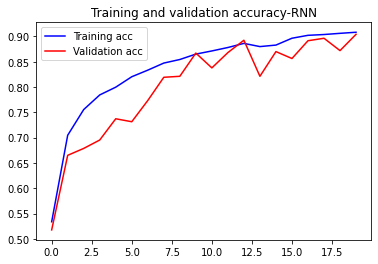

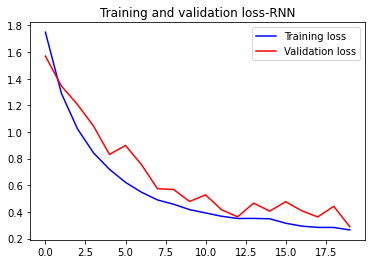

In [39]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-RNN')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-RNN')
plt.legend()
 
plt.show()

In [40]:
#Loading the last epoch model
modelRNN=Sequential()
modelRNN.add(Embedding(len(word_index) + 1, embedding_size, input_length=max_words))
modelRNN.add(SimpleRNN(150,activation = "tanh")) 
modelRNN.add(Dense(1, activation='sigmoid'))
print(modelRNN.summary())
modelRNN.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])
modelRNN.load_weights("my_modRNN_Latest")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 49, 100)           7242700   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 150)               37650     
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 7,280,501
Trainable params: 7,280,501
Non-trainable params: 0
_________________________________________________________________


None


**Confusion Matrix and classification report**

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
y_predict = modelRNN.predict(X_test)
cf_matrix=confusion_matrix(y_test, y_predict.round())
print(classification_report(y_test, y_predict.round()))

88/88 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1401
           1       0.79      0.76      0.77      1397

    accuracy                           0.78      2798
   macro avg       0.78      0.78      0.78      2798
weighted avg       0.78      0.78      0.78      2798



<AxesSubplot:>

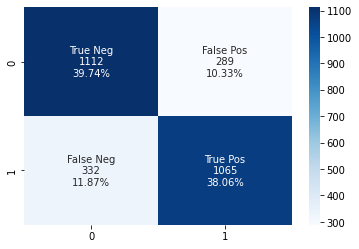

In [57]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [58]:
test_data=['It was not a good day in my life','I was happy today','not a good job']

In [63]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_test  = np.array( tokenizer.texts_to_sequences(test_data))
x_test = pad_sequences(x_test, maxlen=49)
x_test

<ipython-input-63-b583676b4adc>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test  = np.array( tokenizer.texts_to_sequences(test_data))


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  24,  23,   6],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  99, 147],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  24,  82]], dtype=int32)

In [64]:
for i in range(0,len(test_data)):
  print('Test sentence:-',test_data[i])
  
  res=modelRNN.predict(x_test)
  if res[i]>0.3:
    print('Sentiment type:Positive',res[i])
  else:
    print('Sentiment type:Negative',res[i])
  print('==================================================\n')

Test sentence:- It was not a good day in my life
1/1 [==============================] - 0s 120ms/step
Sentiment type:Negative [0.17185912]

Test sentence:- I was happy today
1/1 [==============================] - 0s 129ms/step
Sentiment type:Positive [0.33298424]

Test sentence:- not a good job
1/1 [==============================] - 0s 68ms/step
Sentiment type:Negative [0.04048532]



**Thank You**